# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata,study_results, on="Mouse ID")
merge_df
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Checking the number of mice.
all_mice = len(merge_df["Mouse ID"].unique())
all_mice

249

In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = merge_df[merge_df[["Mouse ID","Timepoint"]].duplicated() ==True]
dup_mice_id = dup_mice["Mouse ID"].unique()
dup_mice_id

array(['g989'], dtype=object)

In [13]:
# Optional: Get all the data for the duplicate mouse ID. 


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merge_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
# Checking the number of mice in the clean DataFrame.
clean_mice = len(clean_data["Mouse ID"].unique())
clean_mice

249

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regi = clean_data.set_index(["Drug Regimen"])
group_drug_regi = drug_regi.groupby("Drug Regimen")
drug_regi_mean = group_drug_regi["Tumor Volume (mm3)"].mean()
drug_regi_med = group_drug_regi["Tumor Volume (mm3)"].median()
drug_regi_var = group_drug_regi["Tumor Volume (mm3)"].var()
drug_regi_std = group_drug_regi["Tumor Volume (mm3)"].std()
drug_regi_sem = group_drug_regi["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
#placeholder
sum_drug_regi_df = pd.DataFrame({"Mean Tumor Volume": drug_regi_mean,"Median Tumor Volume": drug_regi_med, "Tumor Volume Variance": drug_regi_var, "Tumor Volume Std. Dev": drug_regi_std, "Tumor Volume Std. Err.": drug_regi_sem}) 
sum_drug_regi_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

agg_sum = clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean','median','var','std','sem'])
agg_sum


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

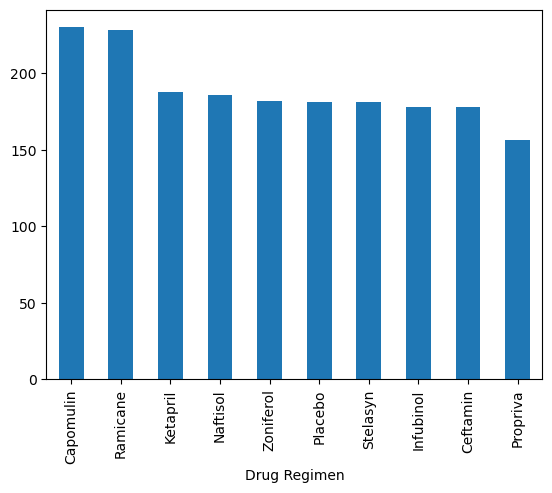

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_time = clean_data[["Drug Regimen","Timepoint"]]
mouse_time

#Each drug
mouse_drug_time = mouse_time["Drug Regimen"].value_counts()
mouse_drug_time

#Dataframe
mouse_drug_time.plot(kind="bar")
plt.xlabel="Drug Regimen"
plt.ylabel="# of Observed Mouse Timepoints"
plt.show()

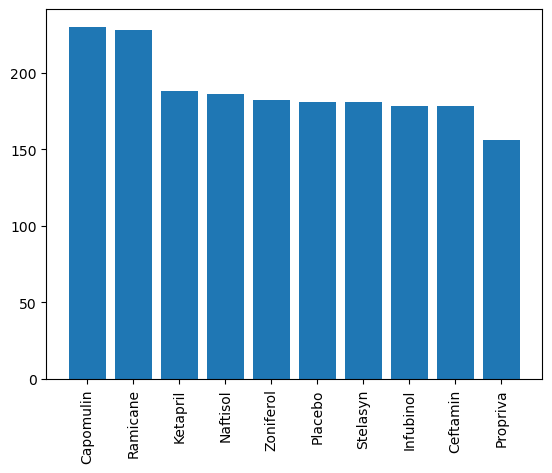

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug = mouse_drug_time.index.values
quantity = mouse_drug_time.values
plt.bar(drug,quantity)
plt.xlabel="Drug Regimen"
plt.ylabel="# of Observed Mouse Timepoints"
plt.xticks(rotation=90)
plt.show()

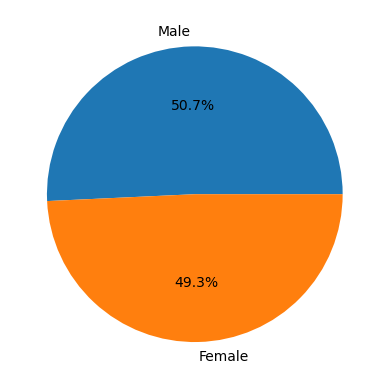

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female_mice = clean_data["Sex"].value_counts()
sex = ["Male","Female"]
plt.pie(male_female_mice,labels = sex,autopct = "%1.1f%%")
plt.ylabel="Sex"
plt.show()

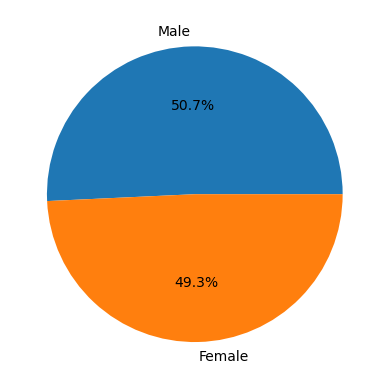

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_mice = male_female_mice.index.values
quantity_mice = male_female_mice.values
plt.pie(quantity_mice,labels = sex_mice, autopct="%1.1f%%")
plt.ylabel="Sex"
plt.show()

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor = clean_data.loc[(clean_data["Drug Regimen"]=="Capomulin")|(clean_data["Drug Regimen"]=="Ramicane")|(clean_data["Drug Regimen"]=="Infubinol")|(clean_data["Drug Regimen"]=="Ceftamin"),["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]
final_tumor
# Start by getting the last (greatest) timepoint for each mouse
last_mouse = final_tumor.groupby(['Drug Regimen','Mouse ID','Tumor Volume (mm3)'])['Timepoint'].max().reset_index()
last_mouse

capomulin_df = last_mouse.loc[last_mouse["Drug Regimen"] == "Capomulin"]
capomulin_df

ramicane_df = last_mouse.loc[last_mouse["Drug Regimen"] == "Ramicane"]
ramicane_df

infubinol_df = last_mouse.loc[last_mouse["Drug Regimen"] == "Infubinol"]
infubinol_df

ceftamin_df = last_mouse.loc[last_mouse["Drug Regimen"] == "Ceftamin"]
ceftamin_df


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

mouse_merge = pd.DataFrame({"Capomulin":capomulin_df["Tumor Volume (mm3)"], "Ramicane": ramicane_df["Tumor Volume (mm3)"], "Infubinol": infubinol_df["Tumor Volume (mm3)"], "Ceftamin": ceftamin_df["Tumor Volume (mm3)"]})
mouse_merge

,Capomulin,Ramicane,Infubinol,Ceftamin
0,37.967644,NaN,NaN,NaN
1,38.379726,NaN,NaN,NaN
2,38.982878,NaN,NaN,NaN
3,40.605335,NaN,NaN,NaN
4,42.731552,NaN,NaN,NaN
...,...,...,...,...
809,NaN,38.504824,NaN,NaN
810,NaN,38.688516,NaN,NaN
811,NaN,42.188787,NaN,NaN
812,NaN,42.952118,NaN,NaN


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = []
for drug in last_mouse["Drug Regimen"]:
    if drug not in treatments:
        treatments.append(drug)

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []
upperq_list = []
lowerq_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    quartiles = mouse_merge[drug].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of treatment is:{lowerq}")
    print(f"The upper quartile of treatment is:{upperq}")
    print(f"The interquartile range of treatment is:{iqr}")
    print(f"The median quartile of treatment is:{quartiles[0.5]}")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of treatment is:37.685932865
The upper quartile of treatment is:45.0
The interquartile range of treatment is:7.314067135000002
The median quartile of treatment is:41.557808879999996
The lower quartile of treatment is:47.2084271125
The upper quartile of treatment is:56.801437570000004
The interquartile range of treatment is:9.593010457500007
The median quartile of treatment is:51.77615728
The lower quartile of treatment is:47.3123533
The upper quartile of treatment is:57.314443967500004
The interquartile range of treatment is:10.002090667500006
The median quartile of treatment is:51.82058438
The lower quartile of treatment is:36.674634585
The upper quartile of treatment is:45.0
The interquartile range of treatment is:8.325365415
The median quartile of treatment is:40.67323554
Values below 24.1865864625 could be outliers.
Values above 57.488048122500004 could be outliers.


<function matplotlib.pyplot.show(close=None, block=None)>

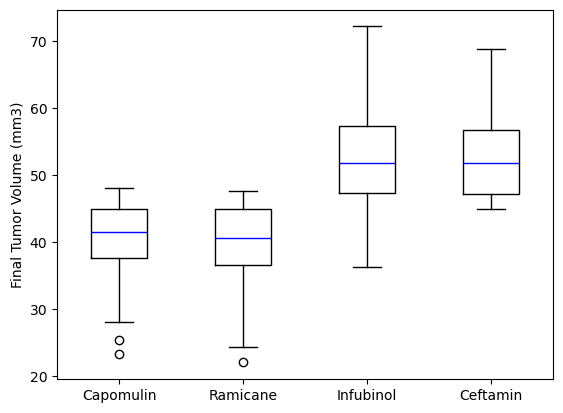

In [30]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
mouseplot = mouse_merge.boxplot(grid=False,color = dict(boxes='k',whiskers='k',medians='b'))
mouseplot.set_ylabel('Final Tumor Volume (mm3)')
plt.show

## Line and Scatter Plots

TypeError: 'str' object is not callable

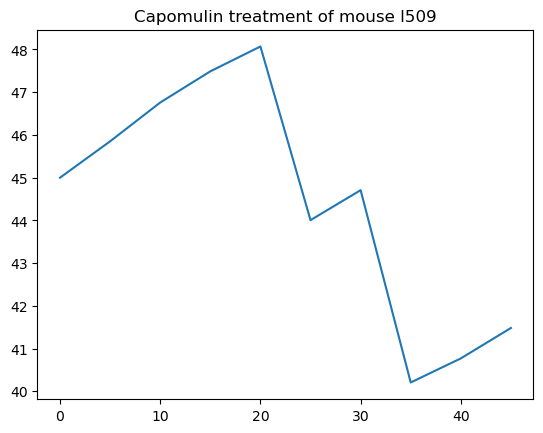

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_df = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin")& (clean_data["Mouse ID"] == "l509") ]
capo_df_zoomed = capo_df[["Timepoint","Tumor Volume (mm3)"]]
capo_df_filtered = capo_df_zoomed.set_index(["Timepoint"]) 
capo_df_filtered

#Values needed for plotting
timepoint = capo_df_filtered.index.values
tumor_vol = capo_df_filtered.values

#line plot
plt.plot(timepoint, tumor_vol)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show

TypeError: 'str' object is not callable

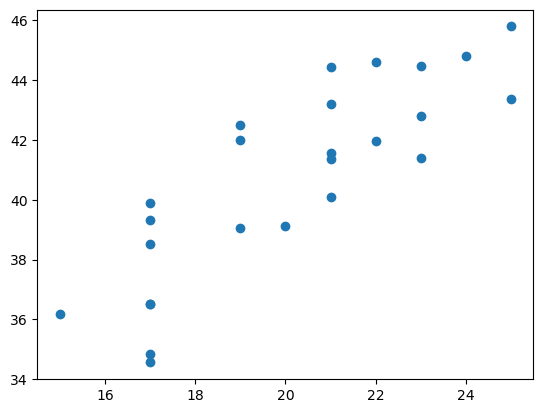

In [32]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
new_capo_df = clean_data.loc[(clean_data["Drug Regimen"] == "Capomulin")]
grouped_capo_df = new_capo_df.groupby("Mouse ID")

#Average tumor vol
tumor_avg = grouped_capo_df[("Tumor Volume (mm3)")].mean()
weight = grouped_capo_df["Weight (g)"].mean()
average_capo_df = pd.DataFrame({"Weight (g)":weight,"Tumor Volume (mm3)":tumor_avg})

#Scatter plot
plt.scatter(weight,tumor_avg)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


TypeError: 'str' object is not callable

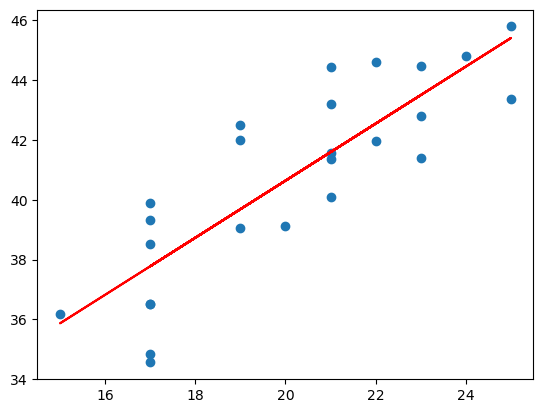

In [33]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr (weight,tumor_avg)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values=average_capo_df["Weight (g)"]
y_values=average_capo_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()